# Keras API Project 

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Goal

Build a model that can predict wether or nor a borrower will pay back their loan?

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [611]:
import pandas as pd

In [612]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [613]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [614]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [615]:
feat_info('mort_acc')

Number of mortgage accounts.


Loading the data and other imports

In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [617]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## EDA

create a countplot of loan status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

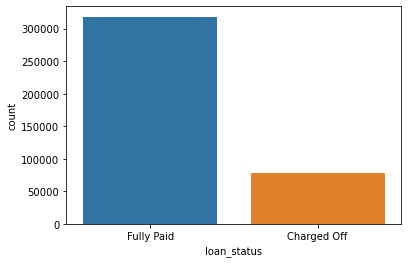

In [619]:
sns.countplot(x='loan_status',data=df)

create a histogram of the loan_amnt 

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

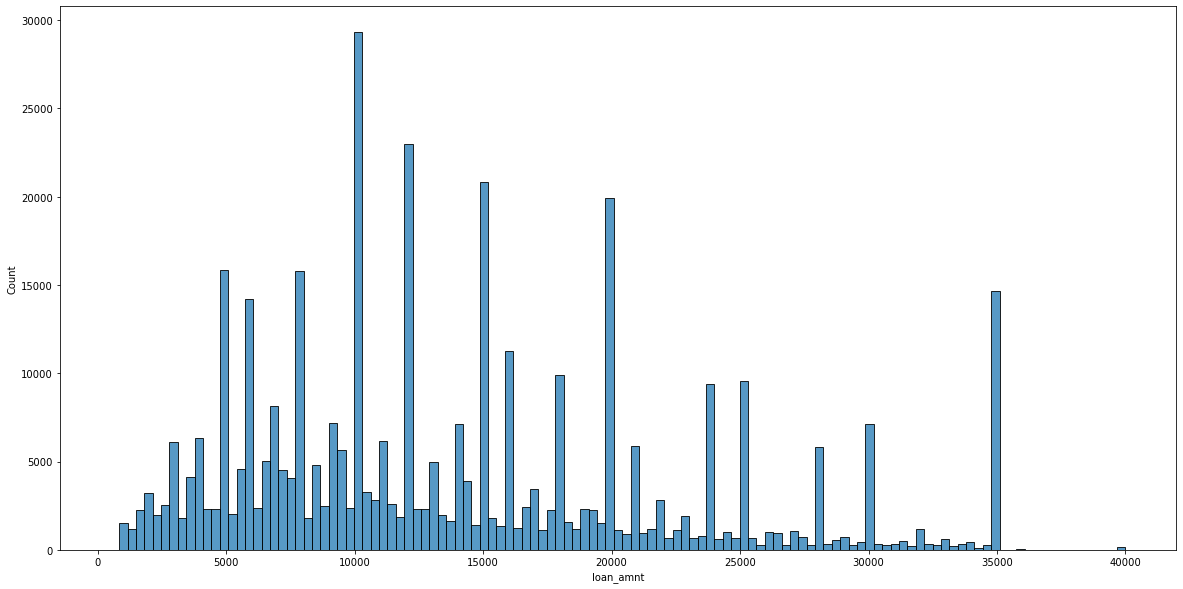

In [620]:
fig,ax = plt.subplots(figsize = (20,10))
sns.histplot(data = df, x = 'loan_amnt', ax = ax)

explore correlations

In [621]:
correlations = df.corr()

<AxesSubplot:>

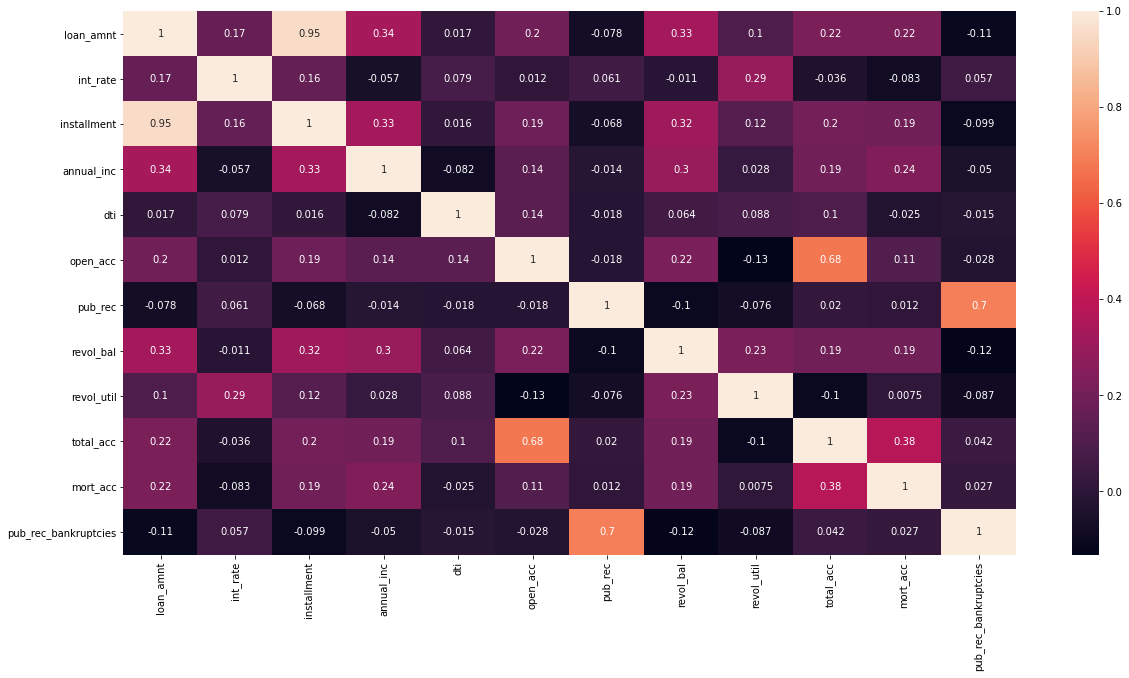

In [622]:
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlations, annot= True, ax = ax)

almost perfect correlation with the "installment" feature!!!

In [623]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [624]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


Text(0, 0.5, 'loan_amnt')

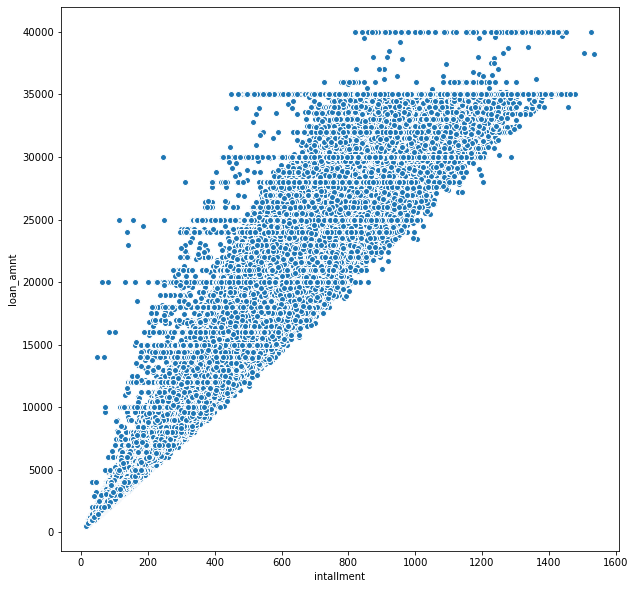

In [625]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=df['installment'],y=df['loan_amnt'],edgecolors='white')
plt.xlabel('intallment')
plt.ylabel('loan_amnt')

boxplot showing the relationship between the loan_status and the loan amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

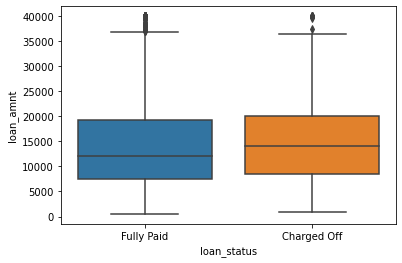

In [626]:
sns.boxplot(data=df, y='loan_amnt',x ='loan_status')

summary statistics for the loan amount, grouped by the loan_status

In [627]:
df.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [628]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


exploring the Grade and SubGrade columns that LendingClub attributes to the loans

In [629]:
list(df['grade'].unique())

['B', 'A', 'C', 'E', 'D', 'F', 'G']

In [630]:
list(df['sub_grade'].unique())

['B4',
 'B5',
 'B3',
 'A2',
 'C5',
 'C3',
 'A1',
 'B2',
 'C1',
 'A5',
 'E4',
 'A4',
 'A3',
 'D1',
 'C2',
 'B1',
 'D3',
 'D5',
 'D2',
 'E1',
 'E2',
 'E5',
 'F4',
 'E3',
 'D4',
 'G1',
 'F5',
 'G2',
 'C4',
 'F1',
 'F3',
 'G5',
 'G4',
 'F2',
 'G3']

countplot per grade

<AxesSubplot:xlabel='grade', ylabel='count'>

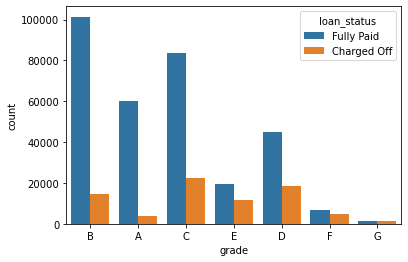

In [631]:
sns.countplot(data = df,x='grade',hue='loan_status')

In [632]:
a = list(df['sub_grade'].unique())
a.sort()
a

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

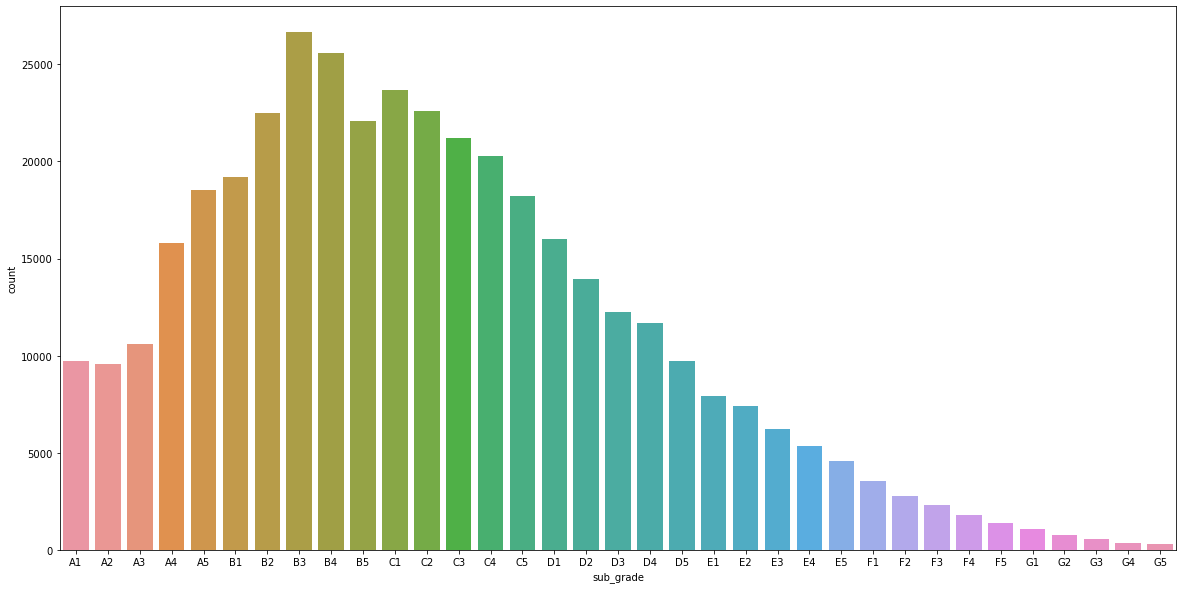

In [633]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data = df,x='sub_grade',order = a,ax = ax)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

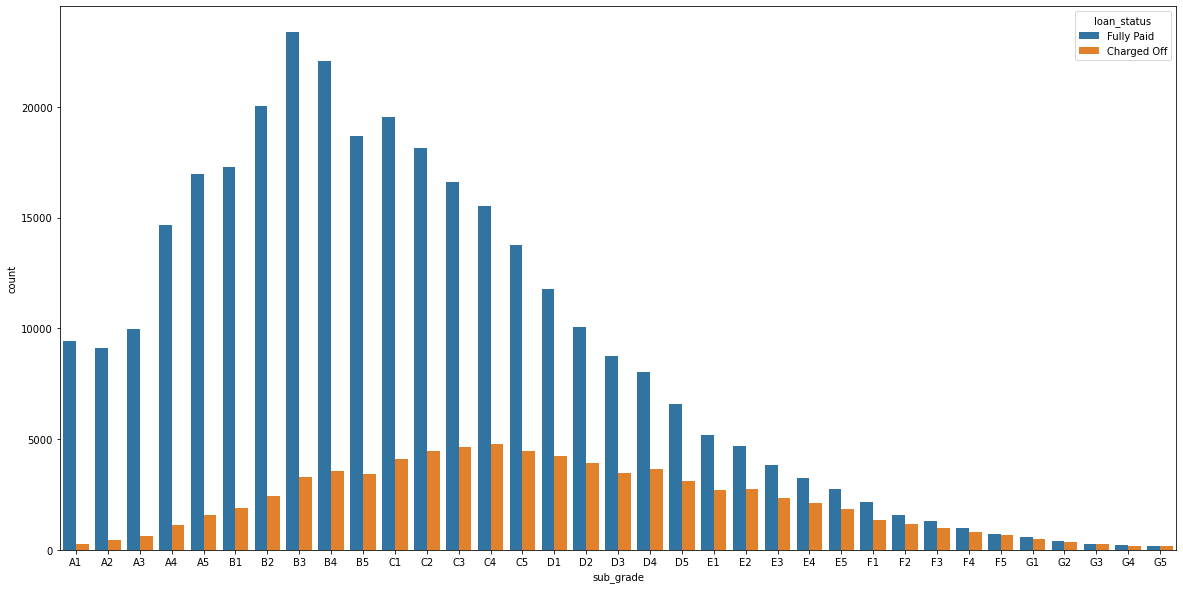

In [634]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data = df,x='sub_grade',hue='loan_status',order = a,ax = ax)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

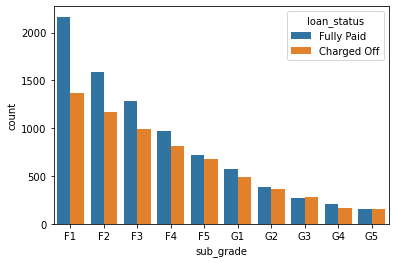

In [635]:
a = list(df['sub_grade'][df['sub_grade']>'F'].unique())
a.sort()
sns.countplot(data = df[df['sub_grade'] > 'F'],x = 'sub_grade',hue='loan_status',order = a)

recode loan_status

In [636]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [637]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

<AxesSubplot:>

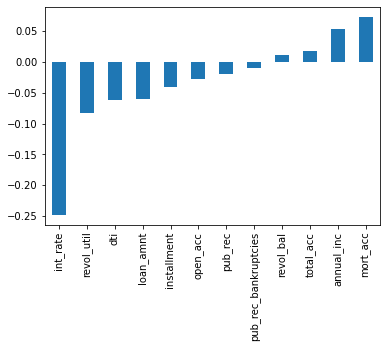

In [638]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Data PreProcessing
Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables



In [640]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Missing Data

In [641]:
len(df)

396030

In [642]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Convert this Series to be in term of percentage of the total DataFrame

In [643]:
df.isna().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Explore emp_title and emp_length to see whether it will be okay to drop them

In [644]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [645]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


How many unique employment job titles are there?

In [646]:
len(df['emp_title'].unique())

173106

too many unique job titles to try to convert this to dummy code

In [647]:
df.drop('emp_title',axis = 1,inplace=True)

A count plot of the emp_length feature column

In [648]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

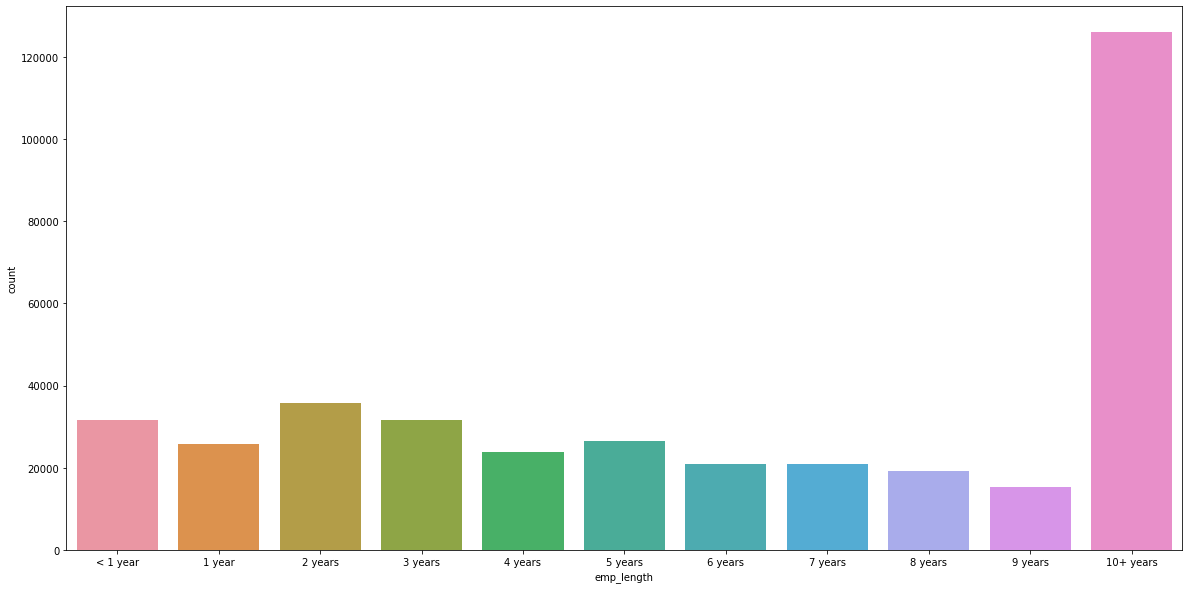

In [649]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data = df,x='emp_length',order = emp_length_order,ax = ax) 

<AxesSubplot:xlabel='emp_length', ylabel='count'>

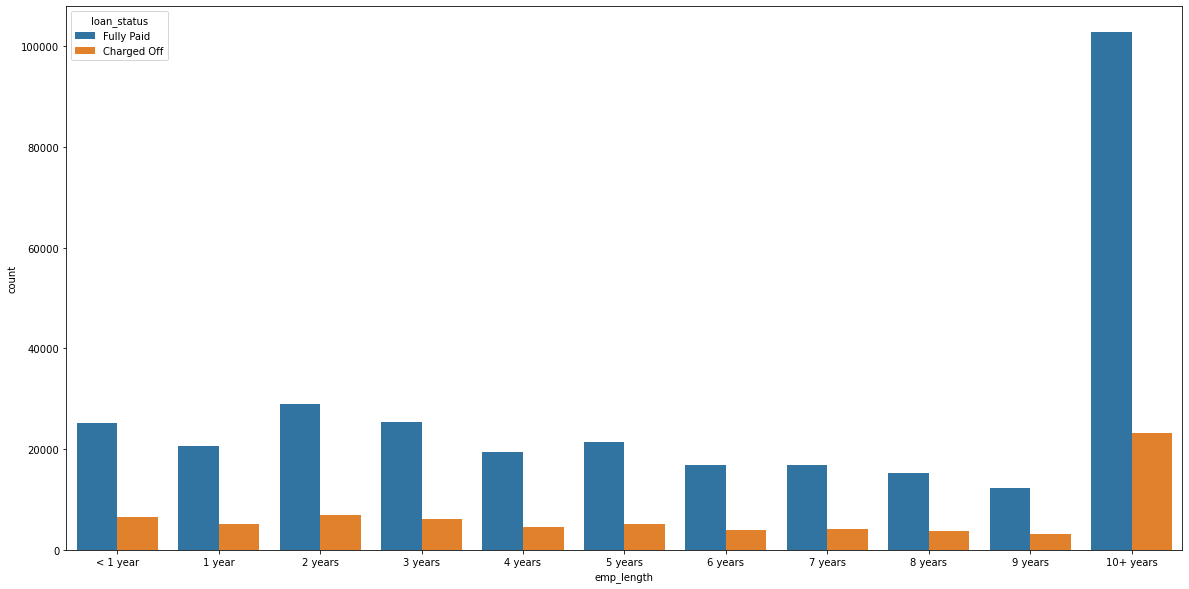

In [650]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data = df,x='emp_length',order = emp_length_order,hue = 'loan_status',ax = ax) 

In [651]:
percentage_of_paid_per_emp_len = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid']/df[df['loan_repaid']==1].groupby('emp_length').count()['loan_repaid']

<AxesSubplot:xlabel='emp_length'>

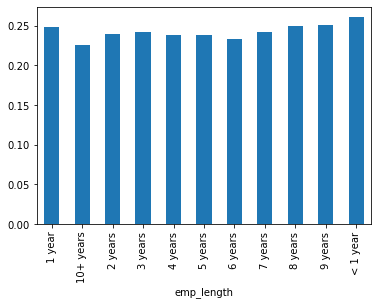

In [652]:
percentage_of_paid_per_emp_len.plot(kind = 'bar')

charge off rates are extremely similar across all employment lengths --> drop

In [653]:
df.drop('emp_length',axis = 1,inplace=True)

In [654]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

title column vs the purpose column

In [655]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [656]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [657]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

repeated info --> drop

In [658]:
df.drop('title',axis = 1,inplace = True)

---
**Replace missing values**

In [659]:
feat_info('mort_acc')

Number of mortgage accounts.


In [660]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [661]:
df.groupby('mort_acc').count()['loan_status']

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
21.0         4
22.0         7
23.0         2
24.0        10
25.0         4
26.0         2
27.0         3
28.0         1
30.0         1
31.0         2
32.0         2
34.0         1
Name: loan_status, dtype: int64

what  other columns highly correlate with  mort_acc

In [662]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

replace with mean total_acc

In [663]:
mean_values = df.groupby('total_acc').mean()['mort_acc']

In [664]:
mean_values[mean_values.index==2].values[0]

0.0

In [665]:
def replace_mort_with_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mean_values[total_acc]
    else:
        return mort_acc
    

In [666]:
# CODE HERE
df['mort_acc'] = df.apply(lambda x: replace_mort_with_acc(x['total_acc'], x['mort_acc']), axis=1)

In [667]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data --> drop

In [668]:
df = df.dropna()

In [669]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

**Categorical Variables and Dummy Variables**

In [670]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [671]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [672]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

grade is part of sub_grade --> drop

In [673]:
df.drop('grade',axis = 1,inplace = True)

In [674]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


dummy code subgrade 

In [675]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
subgrade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [676]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [677]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

verification_status, application_type,initial_list_status,purpose 

In [678]:
ver_stat_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
ver_stat_dummies.head()

,Source Verified,Verified
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1


In [679]:
df = pd.concat([df.drop('verification_status',axis=1),ver_stat_dummies],axis=1)

In [680]:
app_type_dummies = pd.get_dummies(df['application_type'],drop_first=True)
app_type_dummies.head()

,INDIVIDUAL,JOINT
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [681]:
df = pd.concat([df.drop('application_type',axis=1),app_type_dummies],axis=1)

In [682]:
in_list_st_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
in_list_st_dummies.head()

,w
0,1
1,0
2,0
3,0
4,0


In [683]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [684]:
df = pd.concat([df.drop('initial_list_status',axis=1),in_list_st_dummies],axis=1)

In [685]:
purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)
purpose_dummies.head()

,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [686]:
df = pd.concat([df.drop('purpose',axis=1),purpose_dummies],axis=1)

In [687]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


home_ownership

In [688]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [689]:
df['home_ownership'][df['home_ownership']=='NONE'] = 'OTHER'
df['home_ownership'][df['home_ownership']=='ANY'] = 'OTHER'
df['home_ownership'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [690]:
home_own_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
home_own_dummies.head()

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [691]:
df = pd.concat([df.drop('home_ownership',axis=1),home_own_dummies],axis=1)

address --> zipcode

In [692]:
df['zip_code']=df['address'].apply(lambda x : x[-5:])

In [693]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [694]:
zip_code_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
zip_code_dummies.head()

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [695]:
df = pd.concat([df.drop(['zip_code','address'],axis=1),zip_code_dummies],axis=1)

In [696]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


issue_d --> drop (can be predictive of whether loan was given or not)

In [697]:
df.drop('issue_d',axis=1,inplace=True)

earliest_cr_line - extract year

In [698]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [699]:
df.drop('earliest_cr_line',axis = 1,inplace = True)

## Classification

In [700]:
from sklearn.model_selection import train_test_split

In [701]:
df.drop('loan_status',axis = 1,inplace=True)

In [702]:
X = df.drop('loan_repaid',axis = 1)
X = X.values
y = df['loan_repaid'].values

In [703]:
y

array([1, 1, 1, ..., 1, 1, 1])

Grabbing a Sample for Training Time

In [704]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


In [705]:
X_sub = df.drop('loan_repaid',axis = 1)
X_sub = X_sub.values
y_sub = df['loan_repaid'].values

In [706]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_sub, y_sub, test_size=0.2, random_state=101)

Normalizing the Data

In [707]:
from sklearn.preprocessing import MinMaxScaler

In [708]:
scaler = MinMaxScaler()

In [709]:
X_train_scaled = scaler.fit_transform(X_train)

In [710]:
X_test_scaled = scaler.transform(X_test)

In [711]:
X_train_scaled

array([[0.53846154, 1.        , 0.56096611, ..., 0.        , 0.        ,
        0.75384615],
       [0.0974359 , 0.        , 0.51538761, ..., 0.        , 0.        ,
        0.81538462],
       [0.22051282, 0.        , 0.4273471 , ..., 0.        , 0.        ,
        0.89230769],
       ...,
       [0.61538462, 1.        , 0.47721075, ..., 0.        , 0.        ,
        0.78461538],
       [0.79294872, 0.        , 0.31827035, ..., 0.        , 0.        ,
        0.87692308],
       [0.16666667, 0.        , 0.31749123, ..., 0.        , 0.        ,
        0.73846154]])

# Model

In [712]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [713]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [714]:
model.fit(x=X_train_scaled, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test_scaled, y_test), 
          )

Epoch 1/25
124/124 [==============================] - 1s 4ms/step - loss: 0.6375 - val_loss: 0.4031
Epoch 2/25
124/124 [==============================] - 0s 3ms/step - loss: 0.3810 - val_loss: 0.2937
Epoch 3/25
124/124 [==============================] - 0s 3ms/step - loss: 0.3010 - val_loss: 0.2825
Epoch 4/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2909 - val_loss: 0.2784
Epoch 5/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2798 - val_loss: 0.2753
Epoch 6/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2739 - val_loss: 0.2745
Epoch 7/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2731 - val_loss: 0.2731
Epoch 8/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2721 - val_loss: 0.2721
Epoch 9/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2677 - val_loss: 0.2720
Epoch 10/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2606 - val_loss: 0.2717

In [715]:
from tensorflow.keras.models import load_model

In [716]:
model.save('subset_data_project_model.h5')  

ImportError: `save_model` requires h5py.

# Evaluating Model Performance.

In [717]:
losses = pd.DataFrame(model.history.history)

In [718]:
losses

,loss,val_loss
0,0.544572,0.403069
1,0.352900,0.293706
2,0.300225,0.282494
3,0.285889,0.278383
4,0.279128,0.275350
5,0.274352,0.274462
6,0.272674,0.273123
7,0.271348,0.272138
8,0.269653,0.272043
9,0.267766,0.271656


<AxesSubplot:>

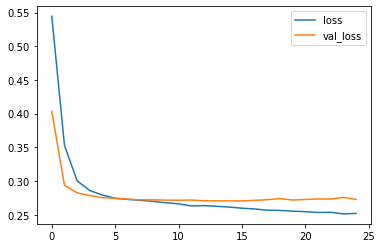

In [719]:
losses.plot()

In [720]:
from sklearn.metrics import classification_report,confusion_matrix

In [721]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

In [722]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.91      0.72      0.76      7905
weighted avg       0.89      0.88      0.87      7905



In [723]:
print(confusion_matrix(y_test,predictions))

[[ 686  884]
 [  38 6297]]


Predict a single customer

In [724]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   36.00
int_rate                7.90
installment           782.26
annual_inc          62000.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 385487, Length: 78, dtype: float64

In [725]:
new_cust_predict = (model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

In [726]:
new_cust_predict

array([[1]], dtype=int32)

In [727]:
df['loan_repaid'].iloc[random_ind]

1